
# Random Forest and Decision tree model for Predicting the probability that borrower will return the loan

For this project I am using publicly available data from [LendingClub.com]. Lending Club connects people who need money (borrowers) with people who have money (investors). I am using lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose for which borrower taking the (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# 1.Importing Libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Preparing the dataframe



In [234]:
df = pd.read_csv('loan_data.csv')

**2.1 Checking out the info(), head(), and describe() methods on dataframe.**

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [236]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [237]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# 3. Data visualization 

**3.1 Creating Correlation plot for the dataframe features.**

<AxesSubplot:>

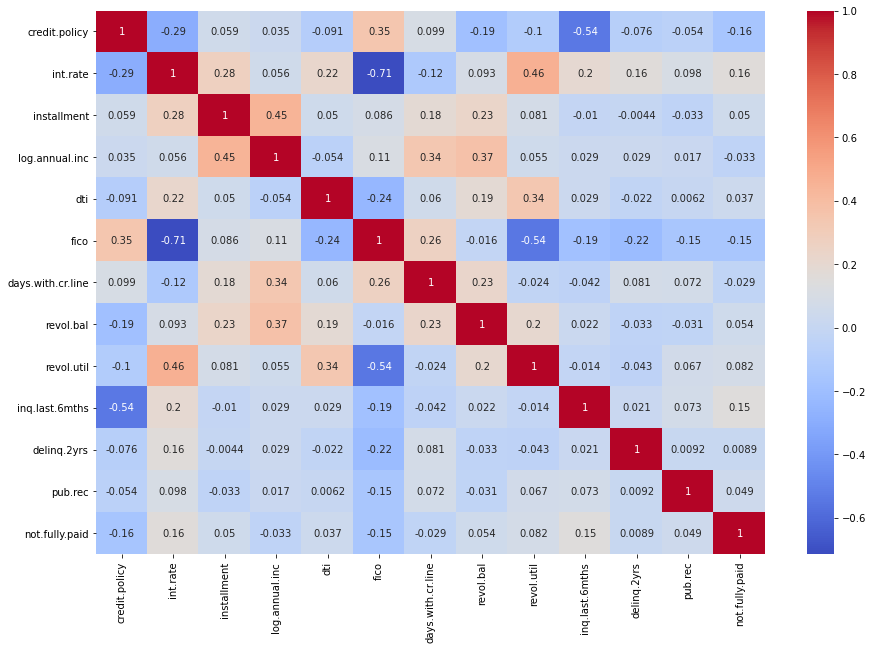

In [238]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot= True, cmap = 'coolwarm')

**Observations-**
1. Target feature 'not.fully.paid' has very week relation with following features: 'delinq.2yrs','log.annual.inc','dti','days.with.cr.line'
2. These Features can be removed from dataset

**3.2 Creating Pairplot for the dataframe**

c:\python37\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\python37\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\python37\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\python37\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\python37\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 1440x720 with 0 Axes>

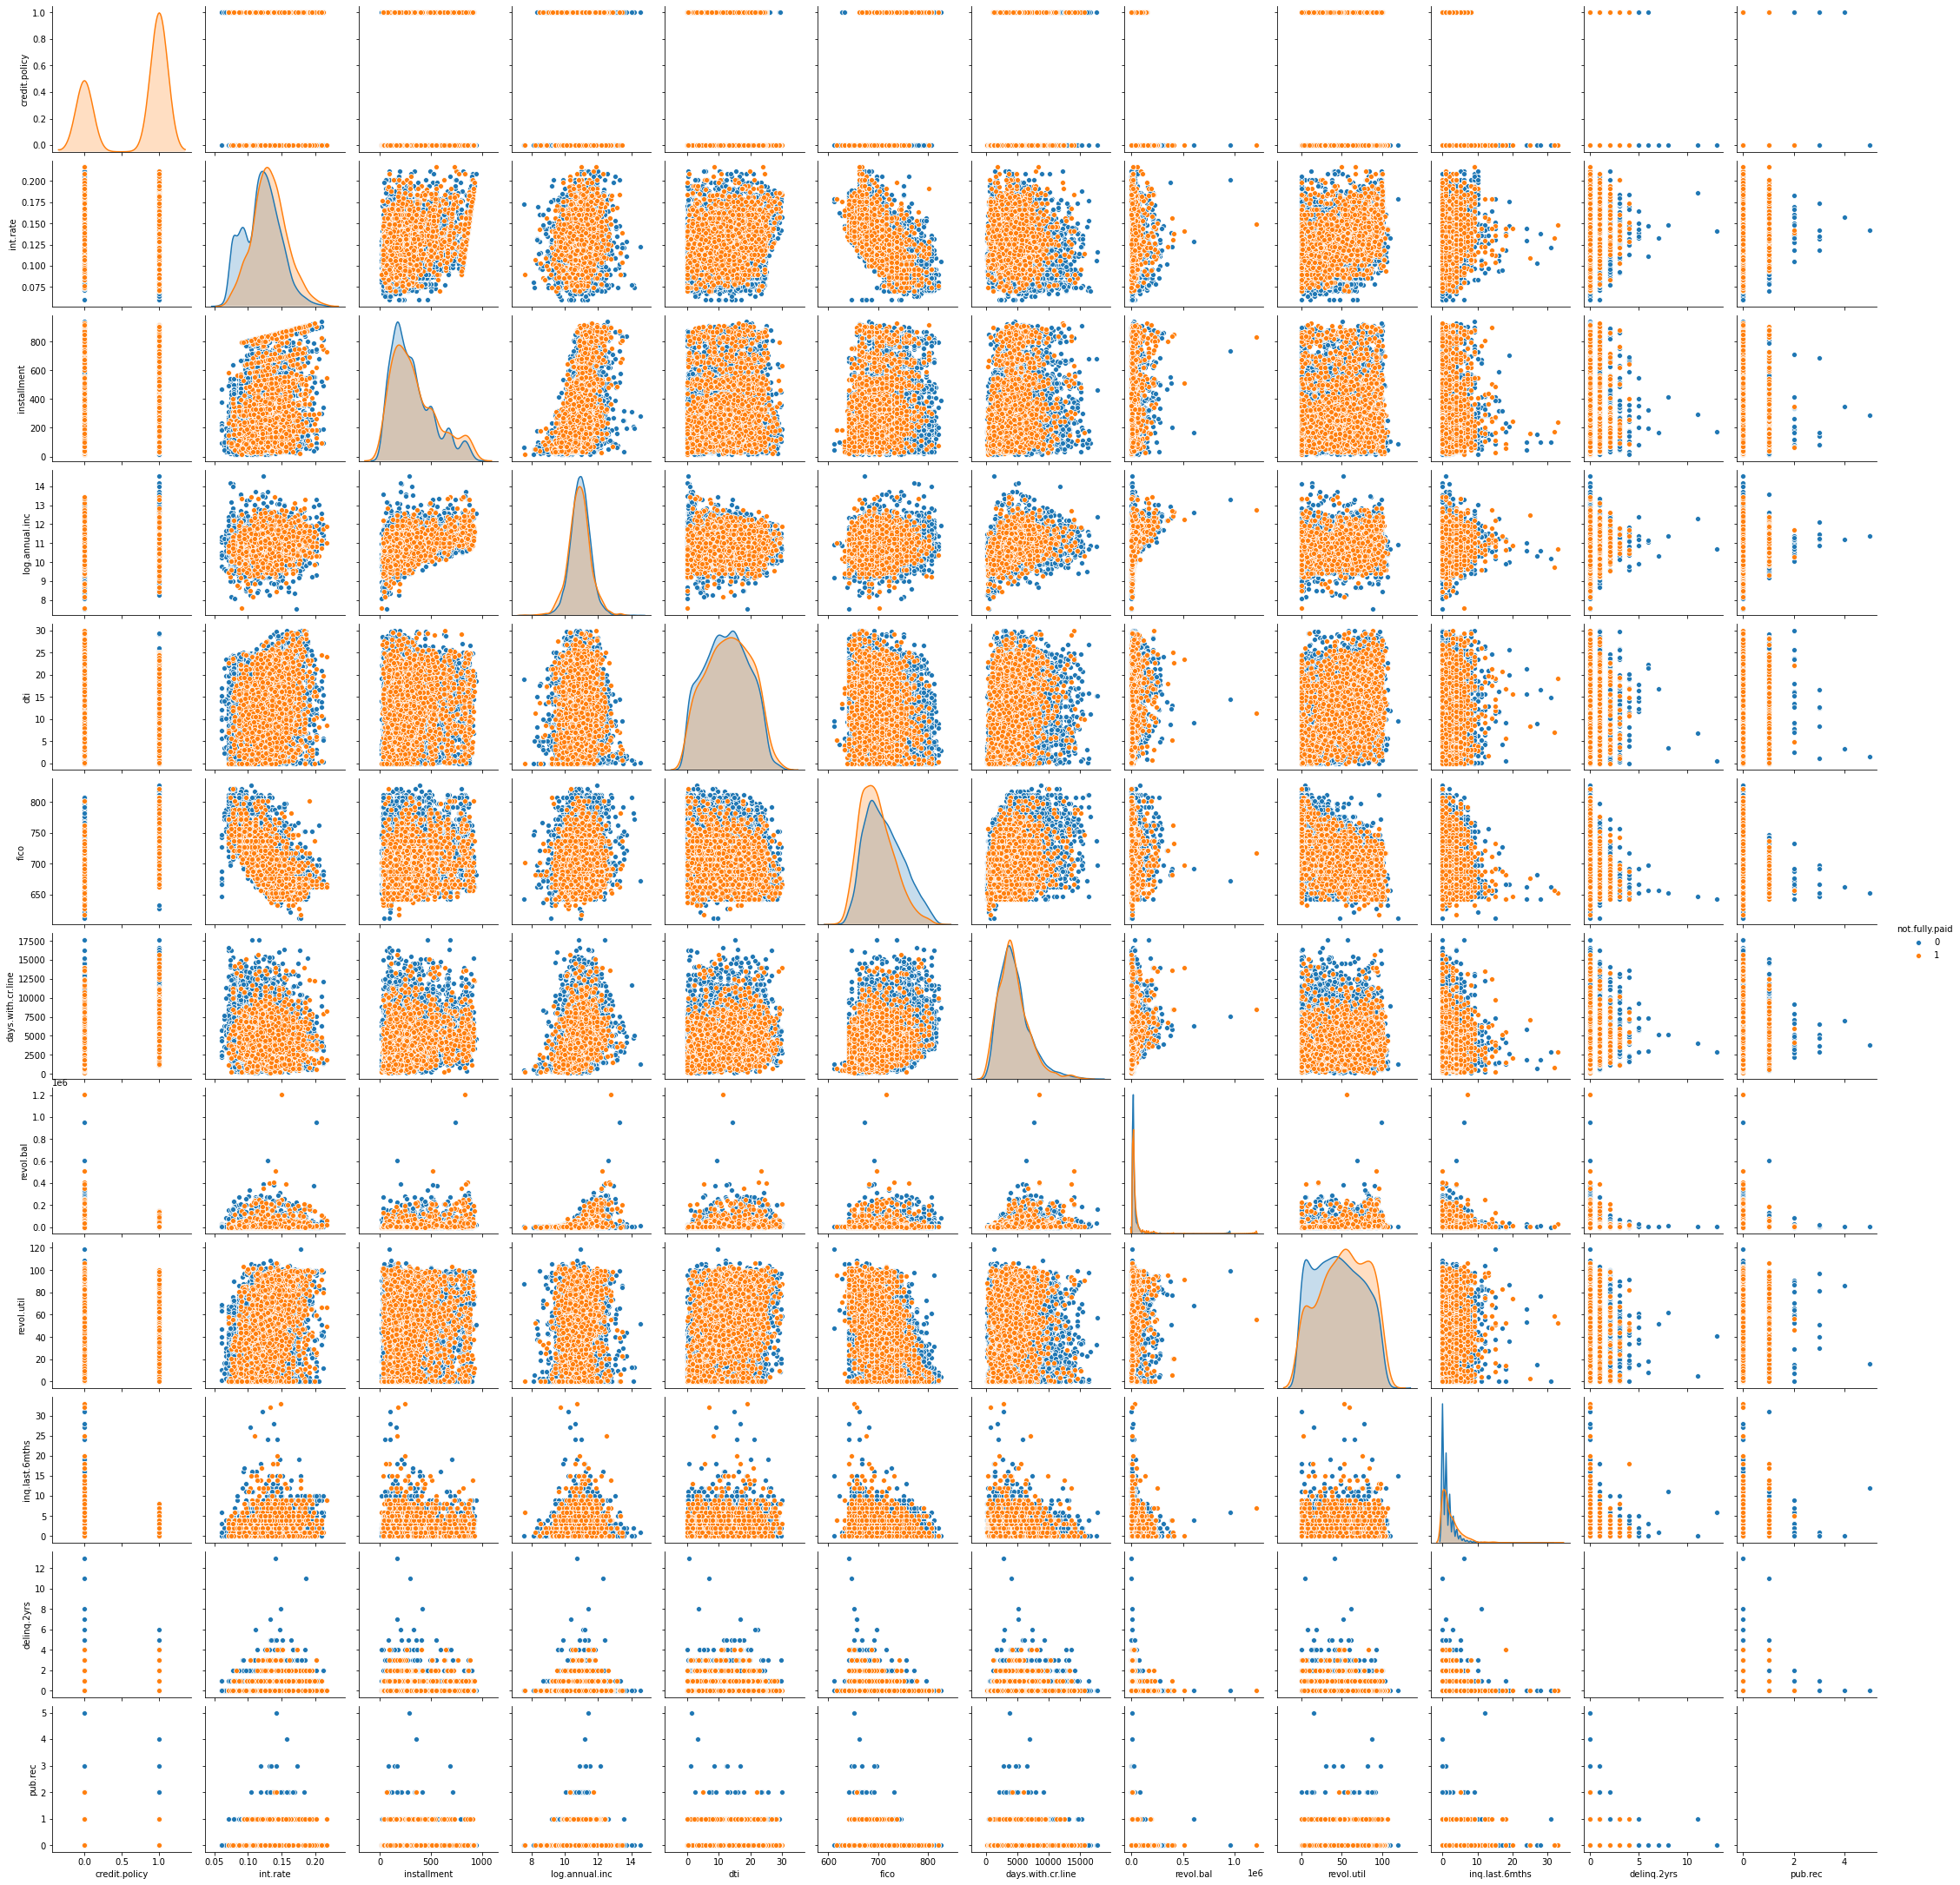

In [239]:
plt.figure(figsize=(20,10))
sns.pairplot(df,hue='not.fully.paid')

**Observation-** The features FICO score and Interest rate has Inverse relation with each other

**3.3 Plotting the countplot of the purpose feature to observe the loan repayment with respect to particular purpose** 

<AxesSubplot:xlabel='purpose', ylabel='count'>

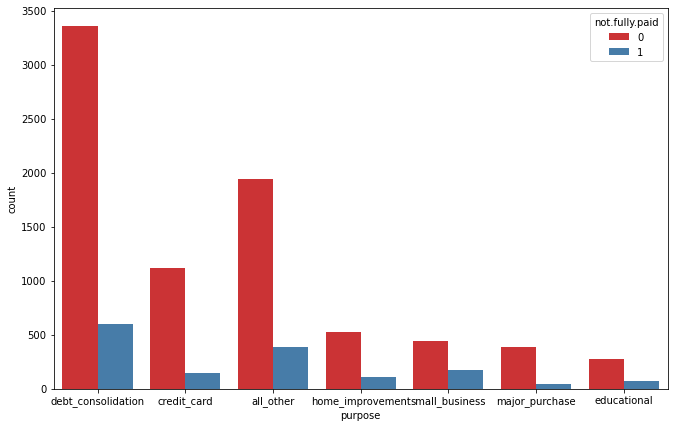

In [240]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')

## 4.Data Cleaning

**4.1 Dropping the features having low correlation with target feature**

In [241]:
df.drop(['delinq.2yrs','log.annual.inc','dti','days.with.cr.line'],axis=1,inplace=True)
df.head()


,credit.policy,purpose,int.rate,installment,fico,revol.bal,revol.util,inq.last.6mths,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,737,28854,52.1,0,0,0
1,1,credit_card,0.1071,228.22,707,33623,76.7,0,0,0
2,1,debt_consolidation,0.1357,366.86,682,3511,25.6,1,0,0
3,1,debt_consolidation,0.1008,162.34,712,33667,73.2,1,0,0
4,1,credit_card,0.1426,102.92,667,4740,39.5,0,0,0


**4.2 Preparing the dummy variables for Purpose feature**


In [144]:
cat_feats = ['purpose']

In [242]:
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [243]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   fico                        9578 non-null   int64  
 4   revol.bal                   9578 non-null   int64  
 5   revol.util                  9578 non-null   float64
 6   inq.last.6mths              9578 non-null   int64  
 7   pub.rec                     9578 non-null   int64  
 8   not.fully.paid              9578 non-null   int64  
 9   purpose_credit_card         9578 non-null   uint8  
 10  purpose_debt_consolidation  9578 non-null   uint8  
 11  purpose_educational         9578 non-null   uint8  
 12  purpose_home_improvement    9578 non-null   uint8  
 13  purpose_major_purchase      9578 

**4.3 Data Imbalance observation**

In [246]:
final_data['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

Data has Imbalance

**4.4 Using Oversampling method to balance the dataset**

In [258]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek()

In [259]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_res,y_res=smk.fit_sample(X,y)

In [260]:
y_res.value_counts()

1    7521
0    7521
Name: not.fully.paid, dtype: int64

**4.5 Scalling the independent features**

In [261]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [262]:
X_res = sc.fit_transform(X_res)

**4.6 Deviding the data into training and testing dataset using sklearn train_test_split method**


In [263]:
from sklearn.model_selection import train_test_split

In [264]:

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=101)

## 5. Training a Decision Tree Model


**5.1 Importing DecisionTreeClassifier**

In [265]:
from sklearn.tree import DecisionTreeClassifier

**5.2 Fitting the model**

In [266]:
dtree = DecisionTreeClassifier()

In [267]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## 6. Predictions and Evaluation of Decision Tree


In [268]:
predictions = dtree.predict(X_test)

In [269]:
from sklearn.metrics import classification_report,confusion_matrix

In [270]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      2267
           1       0.75      0.76      0.76      2246

    accuracy                           0.76      4513
   macro avg       0.76      0.76      0.76      4513
weighted avg       0.76      0.76      0.76      4513



In [271]:
print(confusion_matrix(y_test,predictions))

[[1704  563]
 [ 533 1713]]


## 7. Training the Random Forest model

**7.1 Creating an instance of the RandomForestClassifier class and fitting it to training data from the previous step.**

In [272]:
from sklearn.ensemble import RandomForestClassifier

In [273]:
rfc = RandomForestClassifier(n_estimators=800)

In [274]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=800)

## 8.Predictions and Evaluation


In [277]:
predictions = rfc.predict(X_test)

In [278]:
from sklearn.metrics import classification_report,confusion_matrix

In [279]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.82      0.84      0.83      2267
           1       0.84      0.81      0.82      2246

    accuracy                           0.83      4513
   macro avg       0.83      0.83      0.83      4513
weighted avg       0.83      0.83      0.83      4513



In [281]:
print(confusion_matrix(y_test,predictions))

[[1912  355]
 [ 422 1824]]
